In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from plotSVMBoundaries import plotSVMBoundaries
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
#reading in the train and test data using pandas
dataset1_train = pd.read_csv('dataset1_train.csv')
dataset2_train = pd.read_csv('dataset2_train.csv')
dataset3_train = pd.read_csv('dataset3_train.csv')
dataset1_test = pd.read_csv('dataset1_test.csv')
dataset2_test = pd.read_csv('dataset2_test.csv')
dataset3_test = pd.read_csv('dataset3_test.csv')

# convert DataFrame to numpy arrays
X1_train, y1_train = dataset1_train.iloc[:, :-1].values, dataset1_train.iloc[:, -1].values
X2_train, y2_train = dataset2_train.iloc[:, :-1].values, dataset2_train.iloc[:, -1].values
X1_test, y1_test = dataset1_test.iloc[:, :-1].values, dataset1_test.iloc[:, -1].values
X2_test, y2_test = dataset2_test.iloc[:, :-1].values, dataset2_test.iloc[:, -1].values
X3_train, y3_train = dataset3_train.iloc[:, :-1].values, dataset3_train.iloc[:, -1].values
X3_test, y3_test = dataset3_test.iloc[:, :-1].values, dataset3_test.iloc[:, -1].values

In [4]:
def plot_decision_boundary(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

def svm_classification(X_train, y_train, X_test, y_test, C):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_train, y_train, "Training Set - C=" + str(C))
    plot_decision_boundary(clf, X_test, y_test, "Testing Set - C=" + str(C))
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print("Accuracy on Training Set (C={}): {:.2f}%".format(C, train_acc*100))
    print("Accuracy on Testing Set (C={}): {:.2f}%".format(C, test_acc*100))
    print("Weight vector (w):", clf.coef_)
    print("Bias (w0):", clf.intercept_)

def svm_classification_rbf(X_train, y_train, X_test, y_test, C, gamma):
    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_train, y_train, "Training Set - C={}, gamma={}".format(C, gamma))
    plot_decision_boundary(clf, X_test, y_test, "Testing Set - C={}, gamma={}".format(C, gamma))
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print("Accuracy on Training Set (C={}, gamma={}): {:.2f}%".format(C, gamma, train_acc*100))
    print("Accuracy on Testing Set (C={}, gamma={}): {:.2f}%".format(C, gamma, test_acc*100))
    print("Weight vector (support vectors coefficients):", clf.dual_coef_)
    print("Bias (intercept):", clf.intercept_)


Results for Dataset 1:


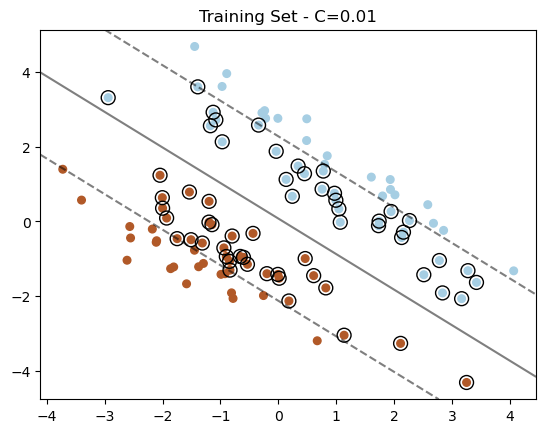

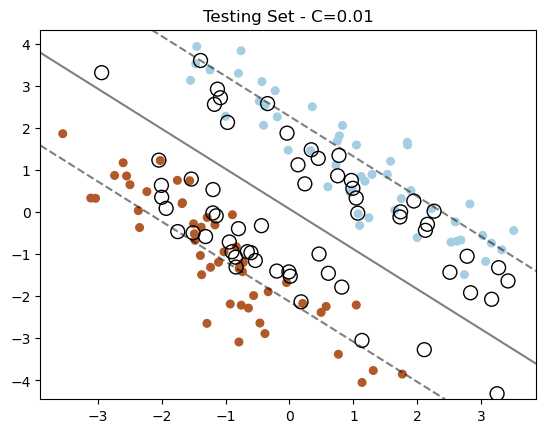

Accuracy on Training Set (C=0.01): 100.00%
Accuracy on Testing Set (C=0.01): 100.00%
Weight vector (w): [[-0.43269826 -0.45380203]]
Bias (w0): [0.0334917]


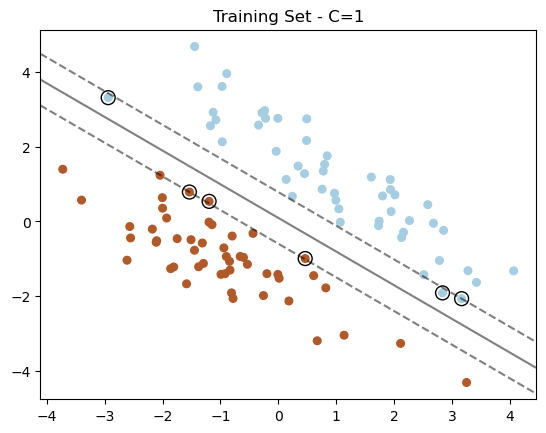

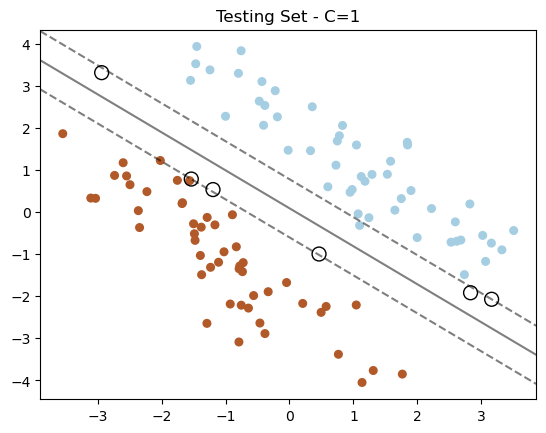

Accuracy on Training Set (C=1): 100.00%
Accuracy on Testing Set (C=1): 100.00%
Weight vector (w): [[-1.30559803 -1.44618539]]
Bias (w0): [0.13069784]


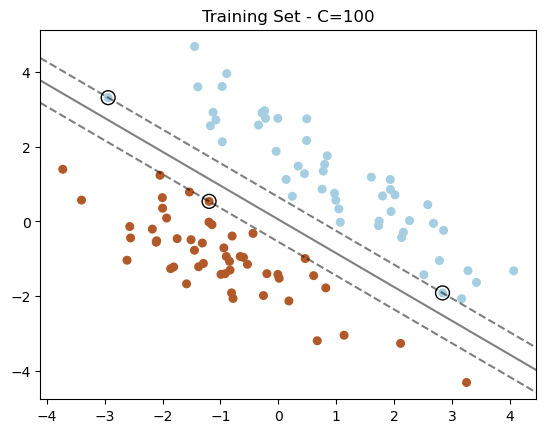

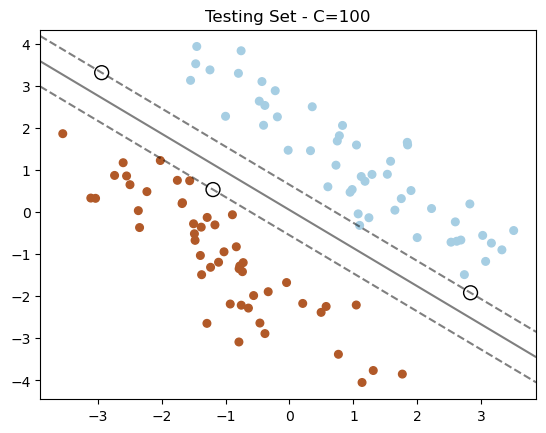

Accuracy on Training Set (C=100): 100.00%
Accuracy on Testing Set (C=100): 100.00%
Weight vector (w): [[-1.51172095 -1.66704685]]
Bias (w0): [0.0841294]

Results for Dataset 2:


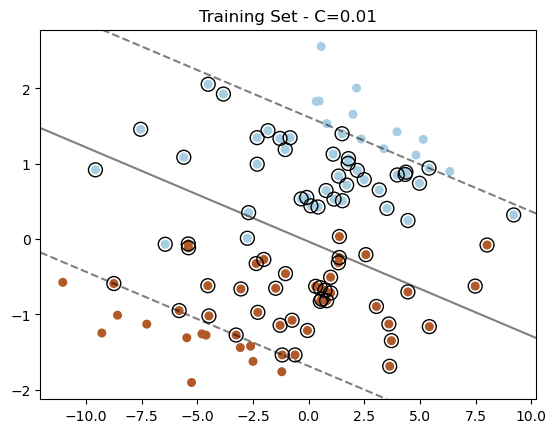

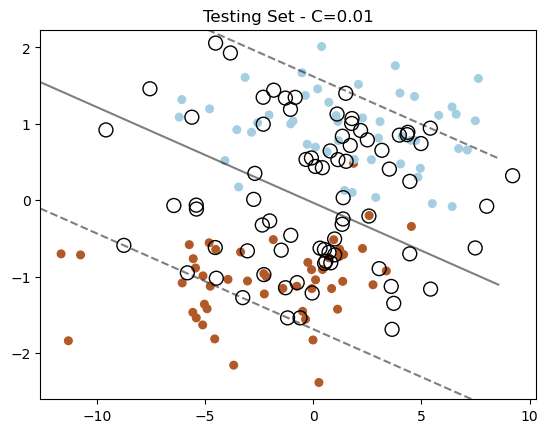

Accuracy on Training Set (C=0.01): 93.00%
Accuracy on Testing Set (C=0.01): 96.00%
Weight vector (w): [[-0.07570018 -0.60532906]]
Bias (w0): [-0.01984842]


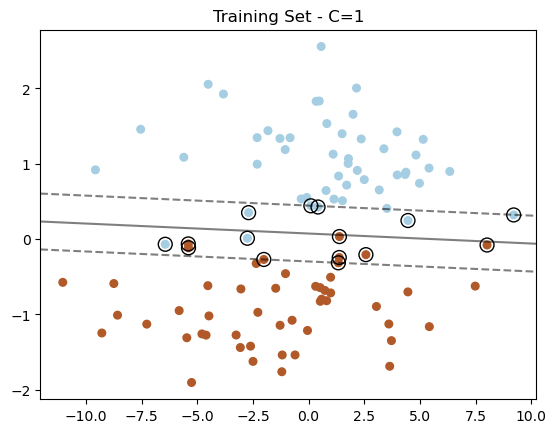

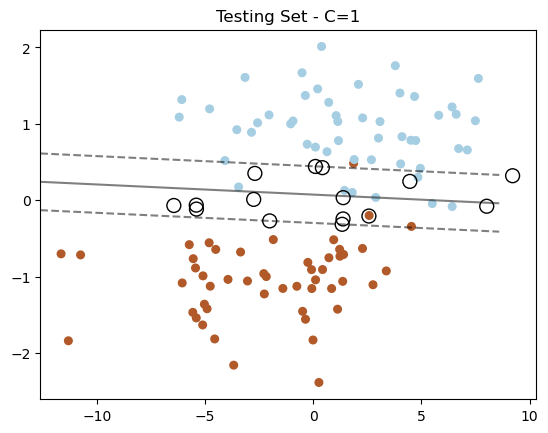

Accuracy on Training Set (C=1): 98.00%
Accuracy on Testing Set (C=1): 97.00%
Weight vector (w): [[-0.03573049 -2.69717452]]
Bias (w0): [0.20142118]


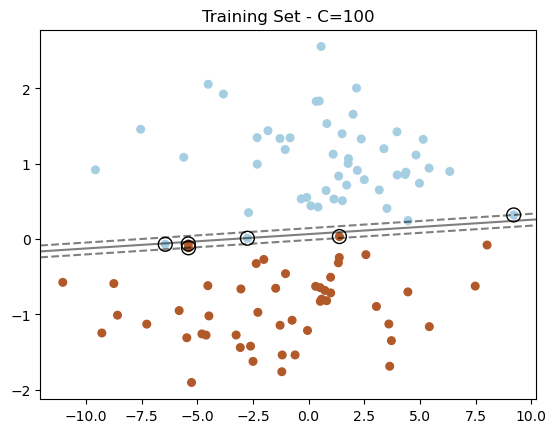

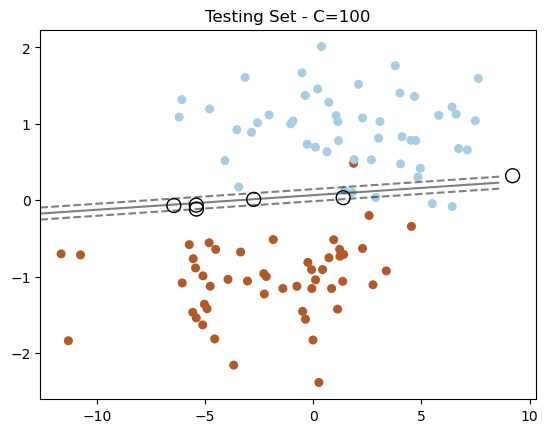

Accuracy on Training Set (C=100): 98.00%
Accuracy on Testing Set (C=100): 96.00%
Weight vector (w): [[  0.24214422 -12.70860054]]
Bias (w0): [0.85328203]


In [5]:
# 2a)
print("Results for Dataset 1:")
svm_classification(X1_train, y1_train, X1_test, y1_test, C=0.01)
svm_classification(X1_train, y1_train, X1_test, y1_test, C=1)
svm_classification(X1_train, y1_train, X1_test, y1_test, C=100)

print("\nResults for Dataset 2:")
svm_classification(X2_train, y2_train, X2_test, y2_test, C=0.01)
svm_classification(X2_train, y2_train, X2_test, y2_test, C=1)
svm_classification(X2_train, y2_train, X2_test, y2_test, C=100)

Results for Dataset 1 with RBF Kernel:


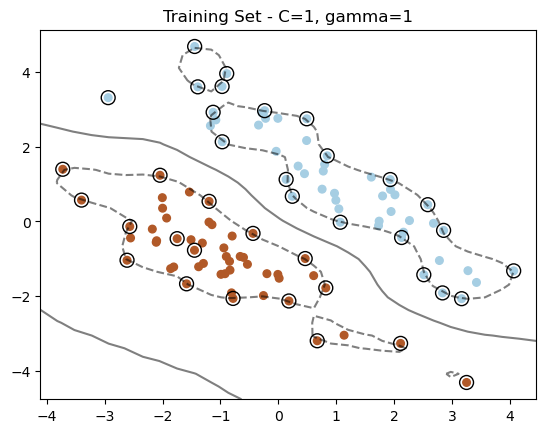

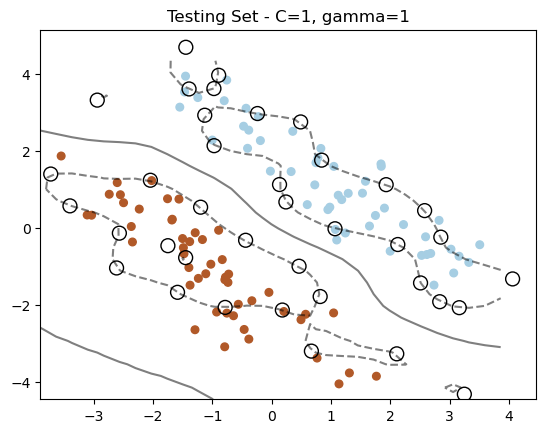

Accuracy on Training Set (C=1, gamma=1): 100.00%
Accuracy on Testing Set (C=1, gamma=1): 100.00%
Weight vector (support vectors coefficients): [[-0.52611397 -0.67958941 -0.19577077 -0.42304669 -0.01726218 -0.25391906
  -0.33796459 -0.7243159  -0.01695785 -0.93911994 -0.89725709 -0.07816905
  -0.95751017 -0.81696044 -0.74752415 -0.61194439 -0.57019403 -0.01431967
  -0.11743876 -0.3766251  -0.36276785  0.51545451  0.44871533  0.67587362
   0.07092691  0.76452584  0.02975835  0.88120734  0.80126818  0.65347501
   0.80679331  0.32519434  0.8215309   0.93705972  0.6230762   0.76507831
   0.0803471   0.46448608]]
Bias (intercept): [-0.01336236]


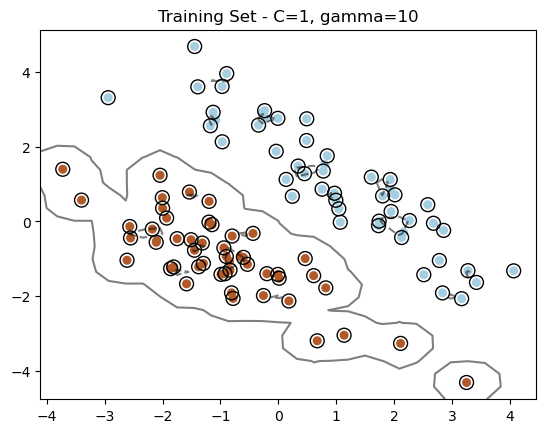

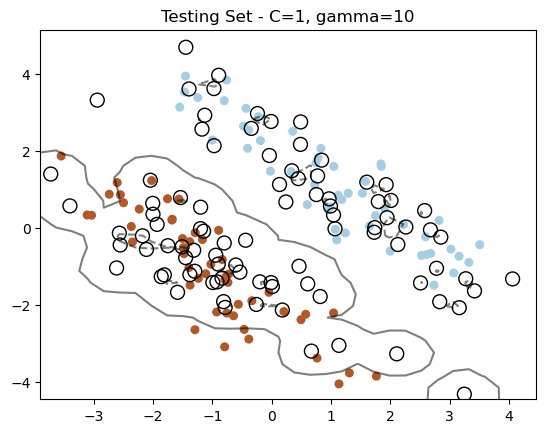

Accuracy on Training Set (C=1, gamma=10): 100.00%
Accuracy on Testing Set (C=1, gamma=10): 92.00%
Weight vector (support vectors coefficients): [[-0.83594645 -0.55934478 -0.88658275 -0.82941697 -0.89830066 -0.57948985
  -0.73129424 -0.56431134 -0.65830186 -0.58786854 -0.8336012  -0.82890531
  -0.87066305 -0.46653462 -0.95625885 -0.67193038 -0.7273842  -0.2417491
  -0.40545653 -0.48297479 -0.85503009 -0.59569892 -0.52287753 -0.88497353
  -0.44365492 -0.84200289 -0.11865214 -0.77079691 -0.95622445 -0.79475069
  -0.70438213 -0.72877577 -0.95080898 -0.70872834 -0.63362403 -0.57848052
  -0.7115717  -0.70223806 -0.07824673 -0.62883467 -0.36568628 -0.77208358
  -0.76846764 -0.71180106  0.60223037  0.50227831  0.87604694  0.71797418
   0.82491966  0.37340127  0.29028365  0.81085399  0.32739419  1.
   0.67145521  0.42991635  0.41642557  1.          0.45557538  0.04988113
   0.9625294   0.92911953  0.46513634  1.          0.19790354  0.40575816
   0.53441991  0.23873756  0.73595117  0.95447345  

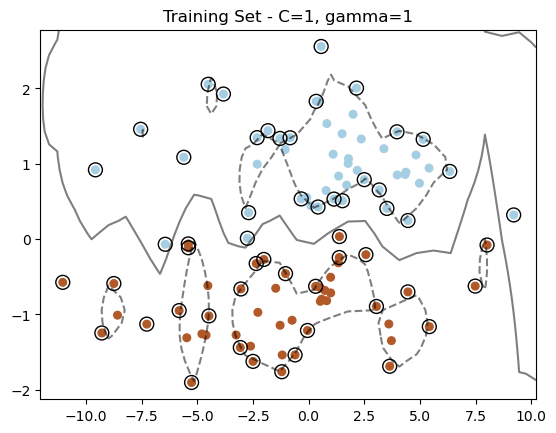

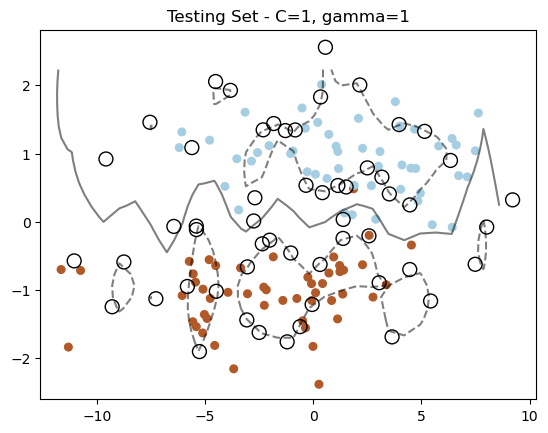

Accuracy on Training Set (C=1, gamma=1): 100.00%
Accuracy on Testing Set (C=1, gamma=1): 96.00%
Weight vector (support vectors coefficients): [[-1.         -1.         -0.16265258 -0.92250084 -0.52905183 -0.83210936
  -0.09807005 -0.63250929 -0.49814787 -1.         -0.72007367 -0.65705735
  -0.68765891 -0.73303474 -1.         -0.50847336 -0.92923684 -1.
  -1.         -0.27851084 -1.         -0.42720151 -0.16505728 -0.01807999
  -0.56002554 -1.         -0.94651588  0.22219175  0.97679938  0.10187749
   1.          0.86394633  0.51096934  0.98754973  0.23633574  0.42956418
   1.          0.26075865  0.36863235  0.54081804  0.67752311  1.
   0.71269308  0.82834013  0.57805631  1.          1.          1.
   0.93638896  0.05822731  0.56686382  0.6552293   0.71511656  0.43600348
   0.64208269]]
Bias (intercept): [0.00273352]


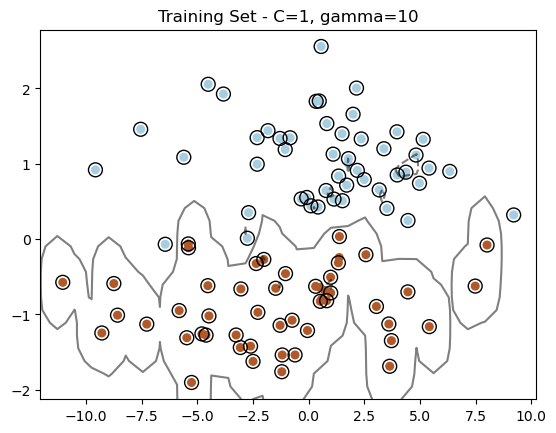

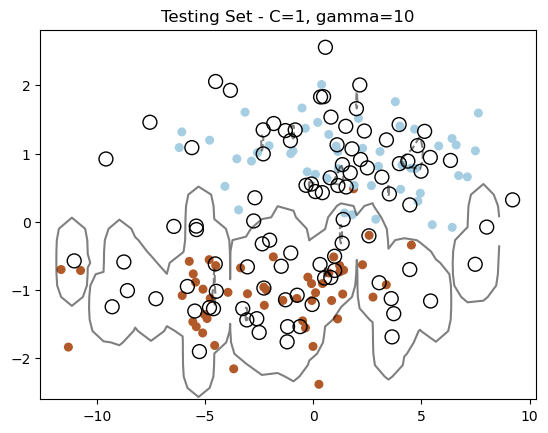

Accuracy on Training Set (C=1, gamma=10): 100.00%
Accuracy on Testing Set (C=1, gamma=10): 92.00%
Weight vector (support vectors coefficients): [[-0.18150439 -0.51377374 -0.49838185 -0.98227979 -0.64614234 -0.71163315
  -0.71097161 -0.77024846 -0.98240276 -0.8032387  -0.28526725 -0.80652395
  -0.87860283 -0.97889798 -0.60416725 -0.39395157 -0.68476987 -0.97506831
  -0.59745608 -0.97453372 -0.68530024 -0.73210252 -0.76515439 -0.81995049
  -0.28168699 -0.81265909 -0.83420387 -0.8191196  -0.77529823 -0.6701064
  -0.73237259 -0.74411639 -0.73384634 -0.77506411 -0.58919867 -0.98253248
  -0.96490183 -0.31567633 -0.75358838 -0.98240521 -0.92733437 -0.71114857
  -0.80523615 -0.66828206 -0.93083705 -0.9826301  -0.84916659 -0.98306975
   0.41555773  0.69401468  0.86257802  0.88806902  1.          0.98812442
   1.          0.33690133  0.54500913  0.62056031  0.86492003  1.
   1.          0.99554581  0.94066264  1.          0.83213533  0.50482977
   0.28672108  0.47740959  0.71164472  0.9730424   

In [38]:
# 2b)
# Perform SVM classification for dataset1 with RBF kernel
print("Results for Dataset 1 with RBF Kernel:")
svm_classification_rbf(X1_train, y1_train, X1_test, y1_test, C=1, gamma=1)
svm_classification_rbf(X1_train, y1_train, X1_test, y1_test, C=1, gamma=10)

# Perform SVM classification for dataset2 with RBF kernel
print("\nResults for Dataset 2 with RBF Kernel:")
svm_classification_rbf(X2_train, y2_train, X2_test, y2_test, C=1, gamma=1)
svm_classification_rbf(X2_train, y2_train, X2_test, y2_test, C=1, gamma=10)


Results for Dataset 3 with Linear Kernel:


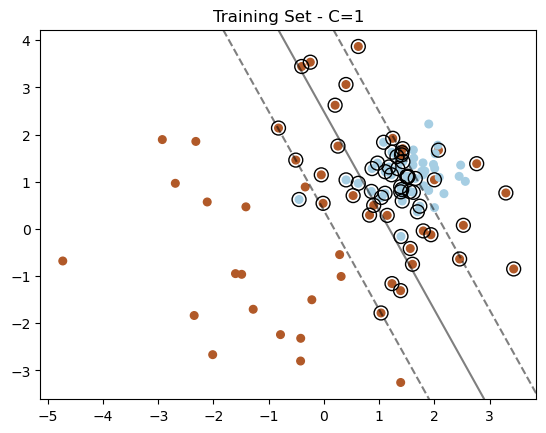

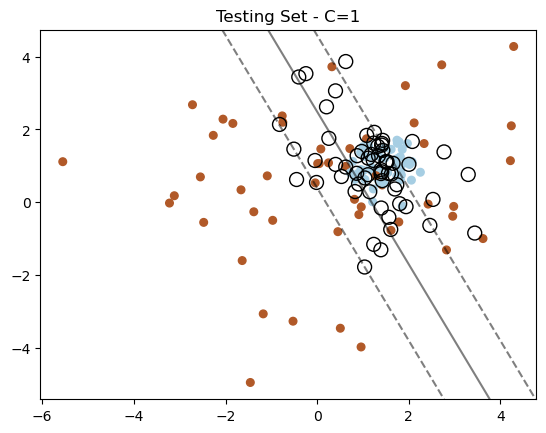

Accuracy on Training Set (C=1): 77.00%
Accuracy on Testing Set (C=1): 79.00%
Weight vector (w): [[-1.0011969  -0.47677308]]
Bias (w0): [1.18630105]


In [31]:
# 2c) Perform SVM classification for dataset3
print("Results for Dataset 3 with Linear Kernel:")
svm_classification(X3_train, y3_train, X3_test, y3_test, C=1)

Results for Dataset 3 with RBF Kernel:


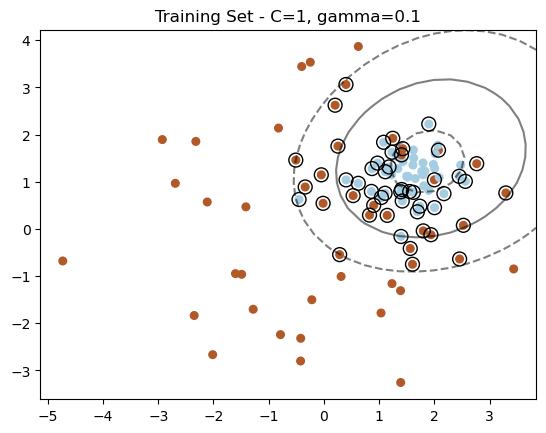

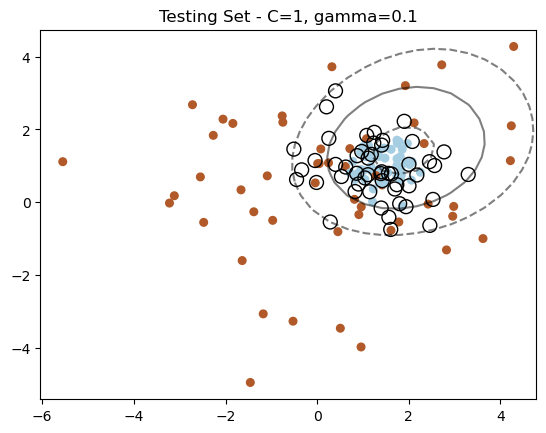

Accuracy on Training Set (C=1, gamma=0.1): 84.00%
Accuracy on Testing Set (C=1, gamma=0.1): 91.00%
Weight vector (support vectors coefficients): [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -0.62552203 -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          0.69566962  0.92985242
   1.          1.          1.          1.          1.          1.
   1.          1.        ]]
Bias (intercept): [1.77111433]


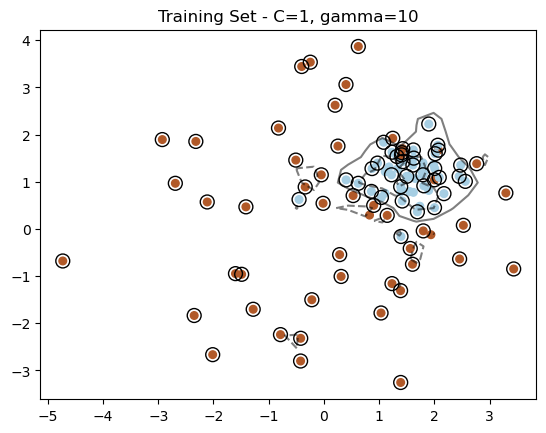

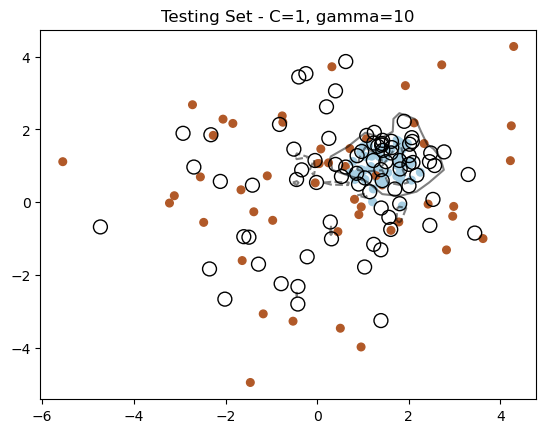

Accuracy on Training Set (C=1, gamma=10): 96.00%
Accuracy on Testing Set (C=1, gamma=10): 88.00%
Weight vector (support vectors coefficients): [[-0.04529878 -1.         -1.         -0.59298834 -0.82260267 -0.79322292
  -0.96115565 -1.         -0.20466303 -0.55821838 -1.         -1.
  -1.         -0.25383164 -1.         -1.         -1.         -0.06830178
  -1.         -0.42769597 -0.93265087 -1.         -0.24015126 -0.94994235
  -1.         -0.87296955 -1.         -1.         -0.19911506 -0.55897022
  -1.         -0.32159703 -1.          0.63533009  0.44107562  0.74112693
   0.40194929  0.43207463  0.44000759  0.73650318  1.          0.47417315
   0.43922315  0.4439637   0.25615841  0.44175283  0.31420568  0.44657976
   0.37907392  0.44236511  0.25755545  0.22784388  0.44226847  1.
   0.26294866  0.45396597  0.39381708  0.44284548  1.          0.40258104
   0.43969153  0.39660687  0.40302498  0.25729802  0.4403408   0.43115299
   0.43595171  1.          1.          0.44268168  0.358652

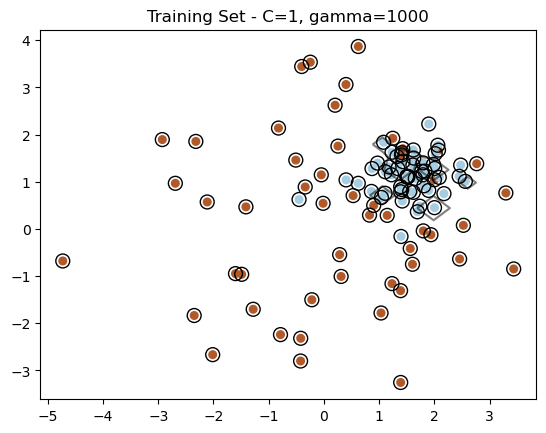

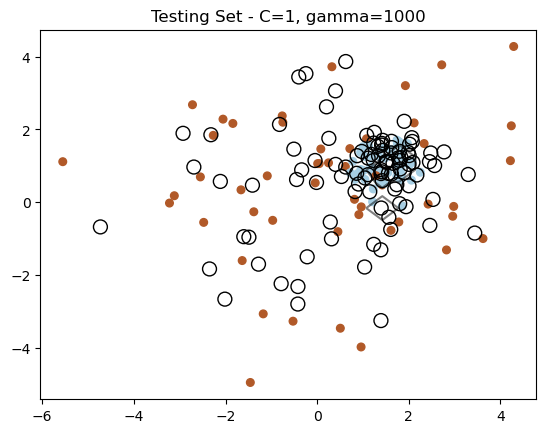

Accuracy on Training Set (C=1, gamma=1000): 100.00%
Accuracy on Testing Set (C=1, gamma=1000): 65.00%
Weight vector (support vectors coefficients): [[-1.         -1.         -0.9896357  -1.         -0.49942314 -0.94669288
  -1.         -1.         -1.         -1.         -1.         -0.99225142
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -0.4992034  -1.         -1.
  -1.         -1.         -0.43865097 -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.96777973 -1.          0.96620049  0.96593623  0.96607708  0.96605033
   0.96601811  0.96607709  0.96578342  0.96572441  0.96578342  0.96585721
   0.96585721  0.96619931  0.96578397  0.96569859  0.96576313  0.96619524
   0.96601811  0.96606923  0.96599608  0.96580609  0.96576313  0.96604971
   0.9660503

In [39]:
# 2d) SVM classification for dataset3 with RBF kernel
print("Results for Dataset 3 with RBF Kernel:")
svm_classification_rbf(X3_train, y3_train, X3_test, y3_test, C=1, gamma=0.1)
svm_classification_rbf(X3_train, y3_train, X3_test, y3_test, C=1, gamma=10)
svm_classification_rbf(X3_train, y3_train, X3_test, y3_test, C=1, gamma=1000)